In [1]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex


In [2]:

test_data_path = "/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01_T1W_nonnordic/TYPED_FITHRF_GLMDENOISE_RR.npy"

fs_dir = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sourcedata/freesurfer'


test_data = np.load(test_data_path, allow_pickle=True).item()
#print(test_data)


for key in test_data:
    print(key)
#R2 = test_data['onoffR2']
R2 = test_data['R2']
##meanvol = test_data['meanvol']
#noisepool = test_data['noisepool']
#HRFindex = test_data['HRFindex']
fracvalue = test_data['FRACvalue']
# print(test_data['meanvol'])
#print(test_data['noisepool'].shape)
#print(test_data['R2'].shape)
#print(noisepool)

betas = test_data['betasmd']
print("betasshape",betas.shape)
print("frac shape",fracvalue.shape)
# #switch the first and second dimension
# betas = np.swapaxes(betas,0,1)

#betamean = np.mean(betas,axis=3)
#print(betamean.shape)





HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
rrbadness
FRACvalue
scaleoffset
meanvol
betasshape (73, 97, 83, 720)
frac shape (73, 97, 83)


/tank/shared/software/environments/preproc/lib/python3.9/site-packages/nilearn/_utils/niimg.py:63: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/tank/shared/software/environments/preproc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



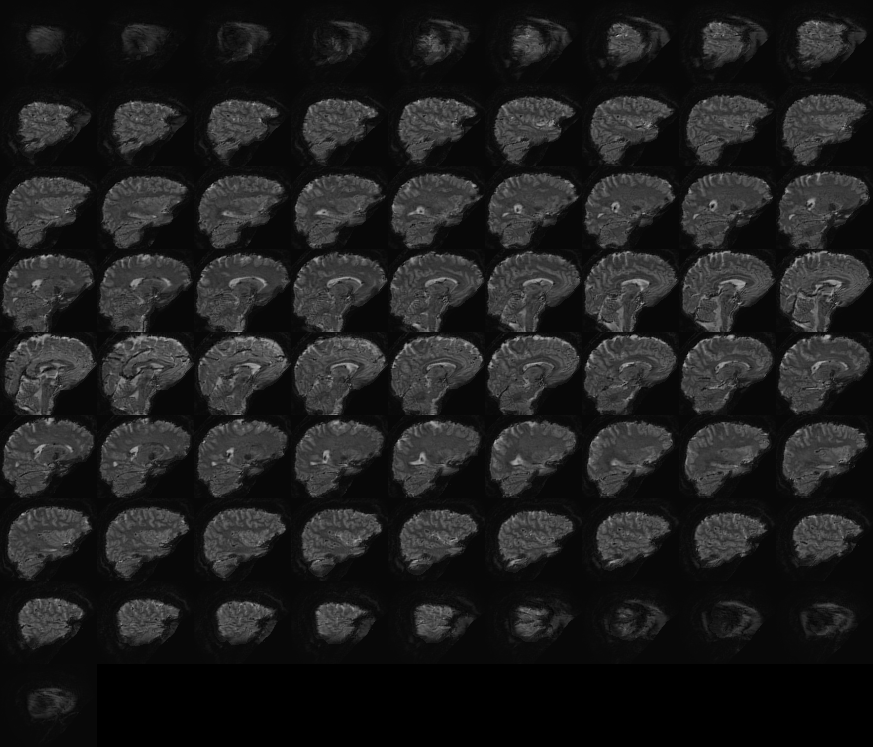
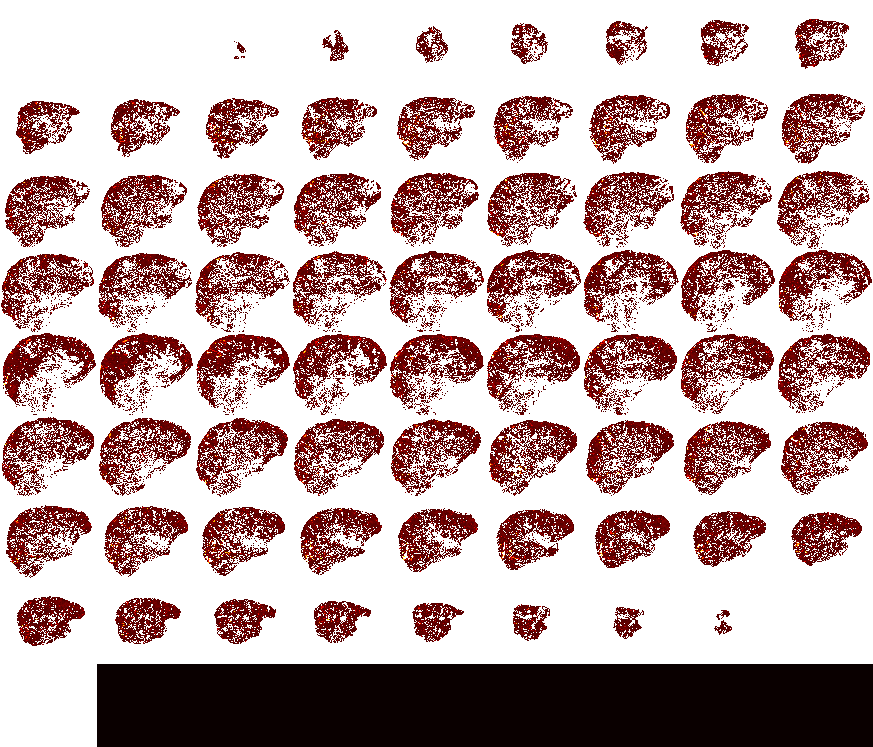

In [3]:
orig_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nonnordic/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz"
bg_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nonnordic/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz"
bm_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nonnordic/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz"

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
R2_masked = np.zeros_like(R2)
R2_masked[bmask] = R2[bmask]
# betamean_masked = np.zeros_like(betamean)
# betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)
# betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(
    R2_img, threshold=5, vmax=50, cmap="hot", symmetric_cmap=False, bg_img=bg_image_fn
)
# view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
# view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

/tank/shared/software/environments/preproc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



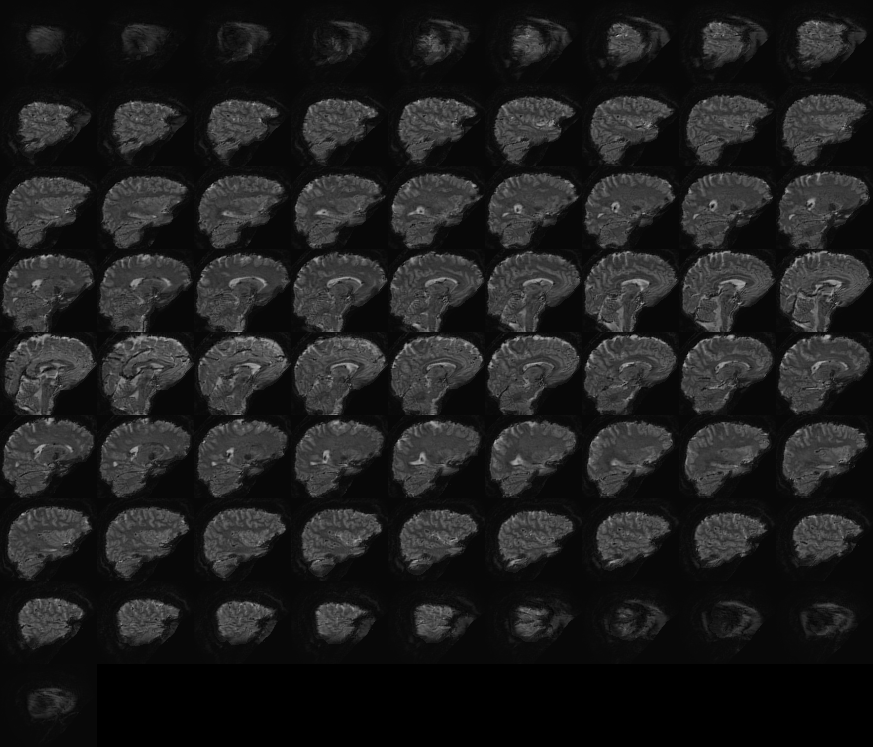
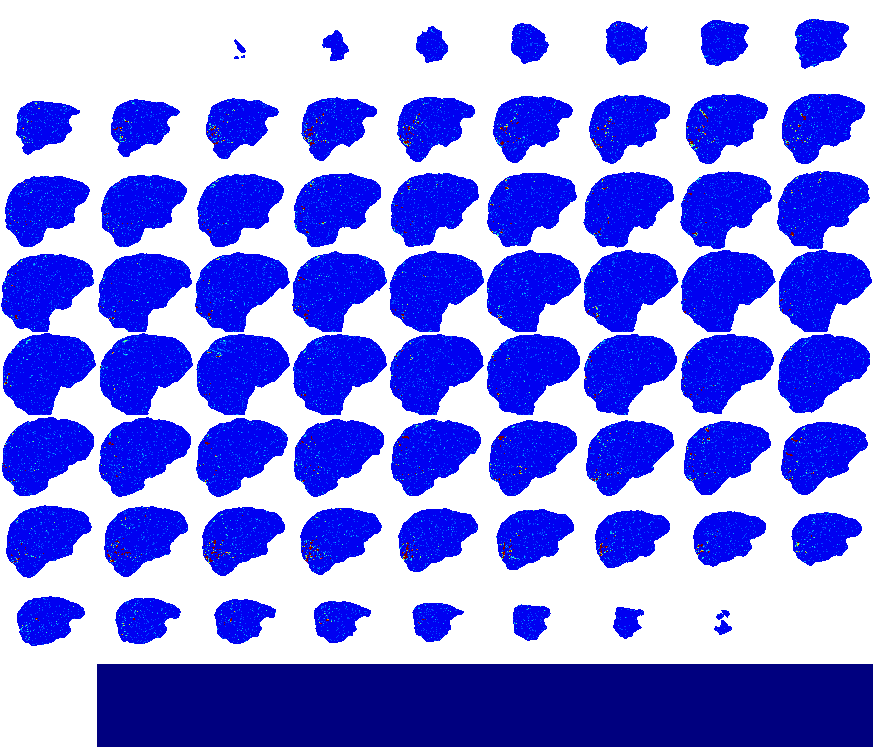

In [6]:
orig_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nonnordic/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz"
bg_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nonnordic/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz"
bm_image_fn = "/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreprocFinal_nonnordic/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz"

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
fracvalue_masked = np.zeros_like(fracvalue)
fracvalue_masked[bmask] = fracvalue[bmask]
# betamean_masked = np.zeros_like(betamean)
# betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
fracvalue_img = nib.Nifti1Image(fracvalue_masked, affine=orig_image.affine, header=orig_image.header)
# betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(
    fracvalue_img, threshold=0, vmax=0.5, cmap="jet", symmetric_cmap=False, bg_img=bg_image_fn
)
# view_img(fracvalue_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
# view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
# fracvalue